In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns

In [4]:
df = pd.read_csv('../data/raw/transcripts.csv')

In [5]:
# Preview
print("🔍 Dataset Preview:")
display(df.head())

🔍 Dataset Preview:


transcript  \
0  Good morning. How are you?(Laughter)It's been ...   
1  Thank you so much, Chris. And it's truly a gre...   
2  (Music: "The Sound of Silence," Simon & Garfun...   
3  If you're here today — and I'm very happy that...   
4  About 10 years ago, I took on the task to teac...   

                                                 url  
0  https://www.ted.com/talks/ken_robinson_says_sc...  
1  https://www.ted.com/talks/al_gore_on_averting_...  
2  https://www.ted.com/talks/david_pogue_says_sim...  
3  https://www.ted.com/talks/majora_carter_s_tale...  
4  https://www.ted.com/talks/hans_rosling_shows_t...

In [6]:
# Dataset shape & columns
print(f"\nTotal rows: {df.shape[0]}, Columns: {list(df.columns)}")


Total rows: 2467, Columns: ['transcript', 'url']


In [7]:
# Check missing values
print("\n⚠ Missing Values:")
print(df.isnull().sum())


⚠ Missing Values:
transcript    0
url           0
dtype: int64


In [8]:
# Length of each transcript
df['transcript_length'] = df['transcript'].apply(lambda x: len(str(x).split()))

In [ ]:
# Histogram of transcript lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['transcript_length'], bins=50, kde=True)
plt.title('Transcript Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.savefig('../reports/transcript_word_count_distribution.png')
plt.show()

In [ ]:
# Top 10 common words
all_text = ' '.join(df['transcript'].dropna().tolist())
words = all_text.split()
word_freq = Counter(words)
common_words = word_freq.most_common(10)

In [11]:
# Bar Plot: Top 10 words
words, counts = zip(*common_words)
plt.figure(figsize=(8, 5))
sns.barplot(x=list(words), y=list(counts))
plt.title('Top 10 Frequent Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.savefig('../reports/top_10_frequent_words.png')
plt.show()

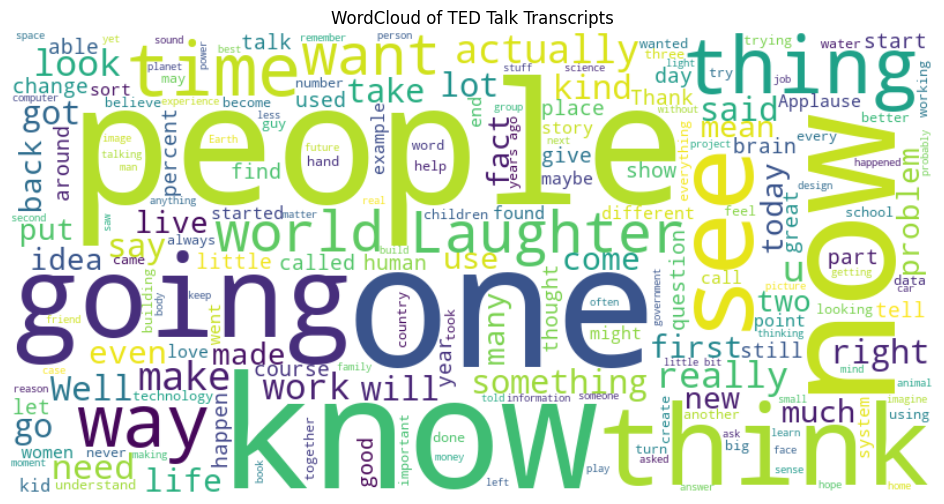

In [12]:
# WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of TED Talk Transcripts')
plt.savefig('../reports/wordcloud_transcripts.png')
plt.show()
